In [11]:
from IPython.display import Markdown, display;
import requests
import pandas as pd
import numpy as np
import datetime
import locale
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# CONFIGURE HERE:

myLocale = "en_US.utf8"
myReserveTime = 1657306697
firstEuReserveTime = 1626454800
myModel = '512GB';
myRegion = 'UK';
regressionDaysNumber = 7;
regressionDegree = 1;
fammysUrl = 'https://docs.google.com/spreadsheet/ccc?key=1ZaKncig9fce7K0sr1f-E2_sgLH1HuKQ-q3k7clPMOCs&output=csv';

# END CONFIGURE

In [12]:
display(Markdown("Downloading CSV data from Fammy's sheet on Google Docs..."))

response = requests.get(fammysUrl)
assert response.status_code == 200, 'Wrong status code'

csvFile = open(".\\Fammy's Steam Deck order tracking - Current bests.csv", "wb");
csvFile.write(response.content);
csvFile.close();

display(Markdown("**Done.**"))

Downloading CSV data from Fammy's sheet on Google Docs...

**Done.**

In [13]:
display(Markdown("Loading CSV data..."))

locale.setlocale(locale.LC_ALL, myLocale)

# Load data
df = pd.read_csv('Fammy\'s Steam Deck order tracking - Current bests.csv', sep = ',')

display(Markdown("**Done**."))

display(Markdown("<hr />"))
display(Markdown("# Current bests:"))

df.tail(9)

Loading CSV data...

**Done**.

<hr />

# Current bests:

,Email Batch,Model,Region,rtReserveTime,Elapsed Time,GMT Time,Diff from last batch,Source,Elapsed Time Formatted,Diff Formatted,Days until today,Days waited,Unnamed: 12,Unnamed: 13,rtReserveTime guess for next batch,Elapsed Guess,"Guess off by, in seconds",% to my deck,Unnamed: 18
396,8-Sep-2022,64GB,US,1652124420,7130:27:00,9-May-2022 19:27:00,667:35:00,https://www.reddit.com/r/SteamDeck/comments/x9...,297d 2h 27m,27d 19h 35m,124,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,8-Sep-2022,256GB,US,1649294769,6344:26:09,7-Apr-2022 01:26:09,747:37:39,https://www.reddit.com/r/SteamDeck/comments/x9...,264d 8h 26m,31d 3h 37m,156,153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,8-Sep-2022,512GB,US,1647574544,5866:35:44,18-Mar-2022 03:35:44,455:38:44,https://www.reddit.com/r/SteamDeck/comments/x9...,244d 10h 35m,18d 23h 38m,176,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,8-Sep-2022,64GB,UK,1652565300,7252:55:00,14-May-2022 21:55:00,711:20:32,https://www.reddit.com/r/SteamDeck/comments/x9...,302d 4h 55m,29d 15h 20m,119,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,8-Sep-2022,256GB,UK,1648664634,6169:23:54,30-Mar-2022 18:23:54,651:54:54,https://www.reddit.com/r/SteamDeck/comments/x9...,257d 1h 23m,27d 3h 54m,164,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,8-Sep-2022,512GB,UK,1647701977,5901:59:37,19-Mar-2022 14:59:37,475:53:37,https://www.reddit.com/r/SteamDeck/comments/x9...,245d 21h 59m,19d 19h 53m,175,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,8-Sep-2022,64GB,EU,1650472140,6671:29:00,20-Apr-2022 16:29:00,31:30:13,https://www.reddit.com/r/SteamDeck/comments/x9...,277d 23h 29m,1d 7h 30m,143,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,8-Sep-2022,256GB,EU,1650026282,6547:38:02,15-Apr-2022 12:38:02,759:17:02,https://www.reddit.com/r/SteamDeck/comments/x9...,272d 19h 38m,31d 15h 17m,148,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,8-Sep-2022,512GB,EU,1648841398,6218:29:58,1-Apr-2022 19:29:58,670:32:28,https://www.reddit.com/r/SteamDeck/comments/wj...,259d 2h 29m,27d 22h 32m,162,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Sanitize data

display(Markdown("Sanitizing data..."))

df['Email Batch Date'] = df['Email Batch'].apply(lambda x : datetime.datetime.strptime(x, "%d-%b-%Y") if isinstance(x, str) else None)
df['Email Batch Timestamp'] = df['Email Batch'].apply(lambda x : int(datetime.datetime.strptime(x, "%d-%b-%Y").timestamp()) if isinstance(x, str) else None)
df['rtReserveTime'] = df['rtReserveTime'].apply(lambda x : int(x) if (isinstance(x, float) and not math.isnan(x)) or isinstance(x, int) else None)

df = df[['Email Batch', 'Email Batch Timestamp', 'GMT Time', 'Model', 'Region', 'rtReserveTime']]

df = df[df['Model'] == myModel]
df = df[df['Region'] == myRegion]

df['MyRtReserveTime'] = myReserveTime
df['myPercentage'] = (df['rtReserveTime'] - firstEuReserveTime) / (myReserveTime - firstEuReserveTime)

display(Markdown("**Done.**"))

display(Markdown("<hr />"))
display(Markdown("# Last email batches for my unit (" + myModel + ", " + myRegion + ")"))

df[['Email Batch', 'Email Batch Timestamp', 'GMT Time', 'rtReserveTime', 'MyRtReserveTime', 'myPercentage']].tail(10)

Sanitizing data...

**Done.**

<hr />

# Last email batches for my unit (512GB, UK)

,Email Batch,Email Batch Timestamp,GMT Time,rtReserveTime,MyRtReserveTime,myPercentage
320,8-Aug-2022,1659909600,29-Jul-2021 13:29:00,1627565340,1657306697,0.035996
329,11-Aug-2022,1660168800,7-Aug-2021 10:46:41,1628333201,1657306697,0.060884
338,15-Aug-2022,1660514400,14-Aug-2021 16:17:00,1628957820,1657306697,0.081130
347,18-Aug-2022,1660773600,13-Sep-2021 09:58:00,1631527080,1657306697,0.164407
356,22-Aug-2022,1661119200,17-Oct-2021 08:06:21,1634457981,1657306697,0.259406
365,25-Aug-2022,1661378400,2-Dec-2021 16:22:27,1638462147,1657306697,0.389193
374,29-Aug-2022,1661724000,14-Jan-2022 15:19:41,1642173581,1657306697,0.509492
383,1-Sep-2022,1661983200,9-Feb-2022 10:42:27,1644403347,1657306697,0.581765
392,5-Sep-2022,1662328800,27-Feb-2022 19:06:00,1645988760,1657306697,0.633153
401,8-Sep-2022,1662588000,19-Mar-2022 14:59:37,1647701977,1657306697,0.688683


<hr />

# My percentage chart

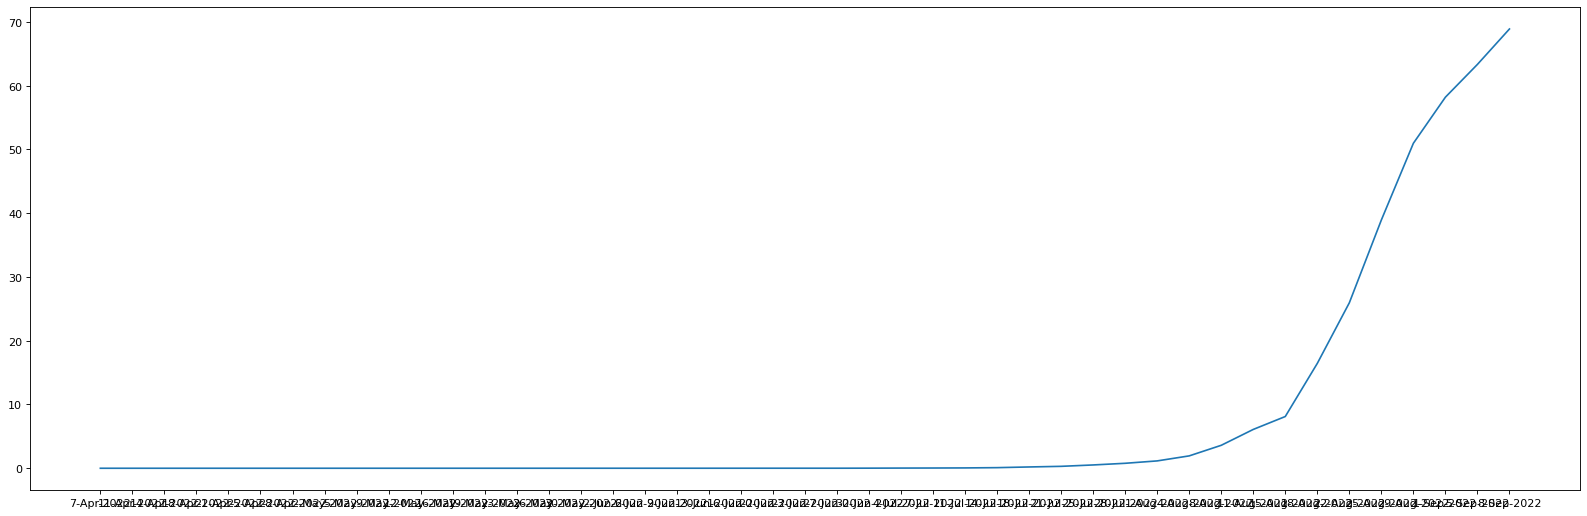

In [15]:
display(Markdown("<hr />"))
display(Markdown("# My percentage chart"))

figure(figsize=(25, 8), dpi=80)
plt.plot(df['Email Batch'], df['myPercentage'] * 100)


<hr />

# My progress, trend and goal

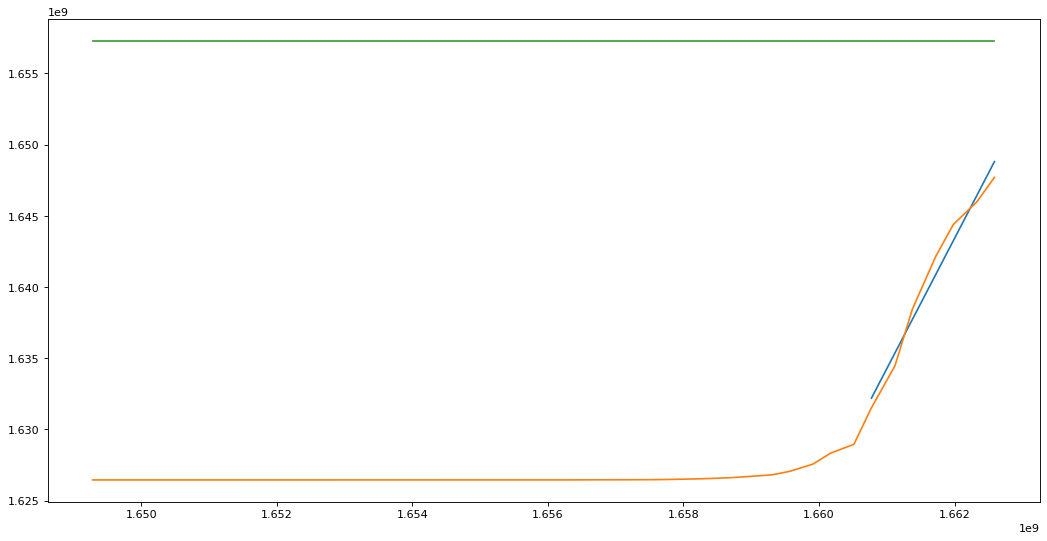

In [21]:
display(Markdown("<hr />"))
display(Markdown("# My progress, trend and goal"))

fit =  np.polyfit(df['Email Batch Timestamp'].tail(regressionDaysNumber), df['rtReserveTime'].tail(regressionDaysNumber), regressionDegree)
model = np.poly1d(fit)


pdf = pd.DataFrame()
pdf['Timestamp'] = df['Email Batch Timestamp']
pdf['Original'] = df['rtReserveTime']
pdf['Prediction'] = pdf['Timestamp'].tail(regressionDaysNumber).apply(lambda x : model(x))
pdf['My'] = myReserveTime

figure(figsize=(16, 8), dpi=80)
plt.plot(pdf['Timestamp'], pdf['Prediction'])
plt.plot(pdf['Timestamp'], pdf['Original'])
plt.plot(pdf['Timestamp'], pdf['My'])

In [22]:
display(Markdown("<hr />"))
display(Markdown("# My estimation for order email"))

roots = (model - myReserveTime).roots
root = int(roots[0])
est = datetime.datetime.fromtimestamp(root)

display(Markdown("Current estimation is **" + '%02i' % est.day + "-" + '%02i' % est.month + "-" + '%04i' % int(est.year) + "**"))

<hr />

# My estimation for order email

Current estimation is **18-09-2022**

In [18]:
display(Markdown("<hr />"))
display(Markdown("# Full history of my percentage"))

df['myPercentage'] * 100

<hr />

# Full history of my percentage

5       0.001504
14      0.002081
23      0.002334
32      0.002441
41      0.002583
50      0.002655
59      0.002752
68      0.002898
77      0.003128
86      0.003468
95      0.003539
104     0.003617
113     0.003880
122     0.004343
131     0.004492
140     0.004924
149     0.004995
158     0.005552
167     0.006139
176     0.006227
185     0.007089
194     0.008042
203     0.008081
212     0.008106
221     0.016550
230     0.029366
239     0.038552
248     0.054755
257     0.096992
266     0.204516
275     0.302727
284     0.519644
293     0.780030
302     1.154227
311     1.941663
320     3.599584
329     6.088446
338     8.113018
347    16.440739
356    25.940645
365    38.919315
374    50.949156
383    58.176478
392    63.315264
401    68.868300
Name: myPercentage, dtype: float64